Predictive Model for Term Deposit

# Importing Libraries and Datasets

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Importing the dataset "bank-additional-full.csv," and displaying the first 5 rows

In [ ]:
df1 = pd.read_csv('bank-additional-full.csv', sep = ';')
df1.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Importing the dataset "bank-additional.csv," and displaying the first 5 rows

In [ ]:
df2 = pd.read_csv('bank-additional.csv', sep = ';')
df2.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Importing the dataset "bank.csv," and displaying the first 5 rows

In [ ]:
df3 = pd.read_csv('bank.csv', sep = ';')
df3.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Importing the dataset "bank-full.csv," and displaying the first 5 rows

In [ ]:
df4 = pd.read_csv('bank-full.csv', sep = ';')
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Exploratory Data Analysis (EDA)

I will be working with the dataset 'bank-full' because it has sufficient data for analysis and building the predictive model.

In [ ]:
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df4.shape

(45211, 17)

Summary statistics of the dataset "Bank-full," and Checking for missing data

In [ ]:
df4.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Checking the data type in the various columns of the **dataset**

In [ ]:
df4.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


Checking for missing values

In [ ]:
print(df4.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


There are no missing values in the dataset, so we can proceed with the analysis

Checking and visualizing target distribution

In [ ]:
target_distribution = df4['y'].value_counts(normalize=True)

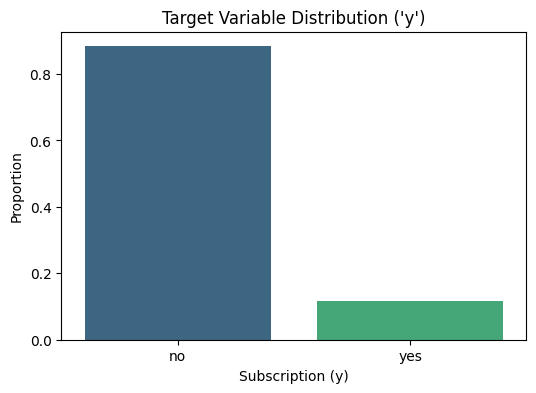

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette="viridis")
plt.title("Target Variable Distribution ('y')")
plt.ylabel("Proportion")
plt.xlabel("Subscription (y)")
plt.show()

The chart indicates an imbalanced dataset that requires appropriate handling techniques during modeling, but we have to analyze relationships between key features and the target variable, even before preprocessing.

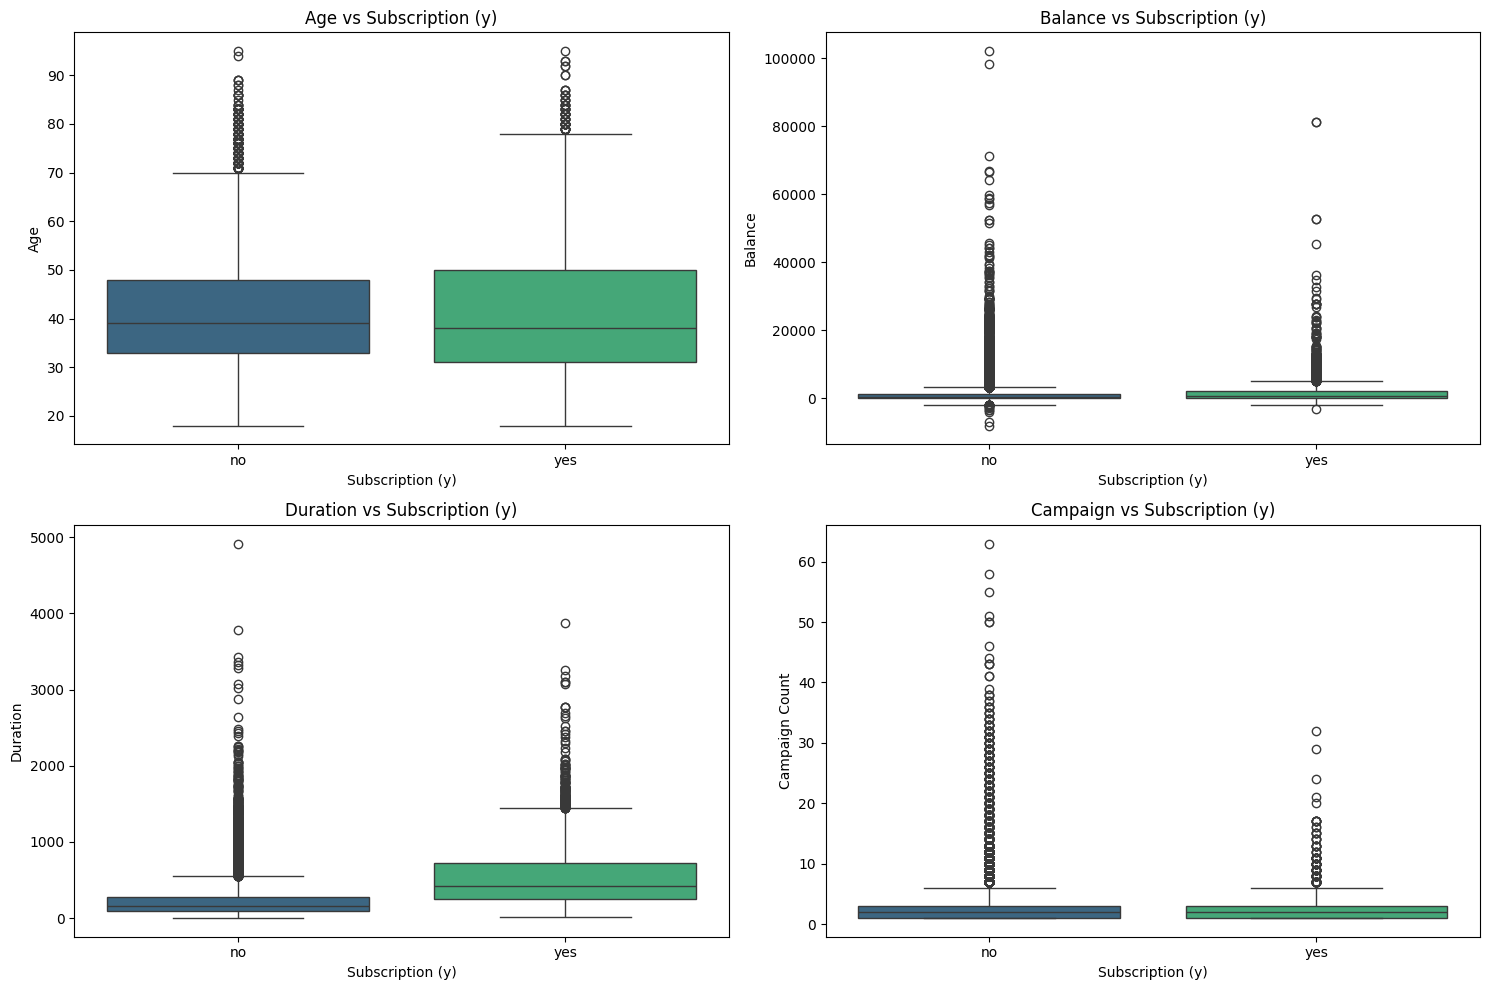

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age vs Target
sns.boxplot(x='y', y='age', data=df4, palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Age vs Subscription (y)")
axes[0, 0].set_xlabel("Subscription (y)")
axes[0, 0].set_ylabel("Age")

# Balance vs Target
sns.boxplot(x='y', y='balance', data=df4, palette="viridis", ax=axes[0, 1])
axes[0, 1].set_title("Balance vs Subscription (y)")
axes[0, 1].set_xlabel("Subscription (y)")
axes[0, 1].set_ylabel("Balance")

# Duration vs Target
sns.boxplot(x='y', y='duration', data=df4, palette="viridis", ax=axes[1, 0])
axes[1, 0].set_title("Duration vs Subscription (y)")
axes[1, 0].set_xlabel("Subscription (y)")
axes[1, 0].set_ylabel("Duration")

# Campaign vs Target
sns.boxplot(x='y', y='campaign', data=df4, palette="viridis", ax=axes[1, 1])
axes[1, 1].set_title("Campaign vs Subscription (y)")
axes[1, 1].set_xlabel("Subscription (y)")
axes[1, 1].set_ylabel("Campaign Count")

plt.tight_layout()
plt.show()

**Summary of analysis between key features and target variable**

*           **Age:** The age distribution for subscribers ("yes") shows a slight skew towards older clients compared to non-subscribers ("No").

*           **Balance:** Subscribers tend to have higher account balances, but the distributions have overlapping ranges.

*           **Duration:** Call duration is also higher for subscribers ("Yes"). This suggests that longer conversations with the bank's customer service may have influenced more people to subscribe.

*           **Campaign:** Both groups have similar range, but there are outliers with unusally high campaign counts. This is handled in the code below using the IQR Method.

In [ ]:
# Handling outliers in the campaign column
Q1 = df4['campaign'].quantile(0.25)
Q3 = df4['campaign'].quantile(0.75)
IQR = Q3 - Q1
df = df4[(df4['campaign'] >= Q1 - 1.5 * IQR) & (df4['campaign'] <= Q3 + 1.5 * IQR)]

# Preprocessing the data and Performing Feature Engineering

In [ ]:
df4.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


We will begin by creating a new feature 'age_group' and apply the bining technique, then we will convert Categorical features to Numerical values to ensure easy use and processing.

In [ ]:
# Creating a new feature 'age_group'
df4['age_group'] = pd.cut(df4['age'], bins=[0, 30, 50, 70, 100], labels=['Young', 'Middle-Aged', 'Old', 'Very Old'])
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Old
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Middle-Aged
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Middle-Aged
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Middle-Aged
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Middle-Aged


In [ ]:
# Converting categorical features to numerical values using one-hot encoding
df = pd.get_dummies(df4, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age_group'], drop_first=True)

Normalizing the data

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Converting categorical features to numerical values using one-hot encoding
df = pd.get_dummies(df4, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age_group'], drop_first=True)

# Use the new dataframe 'df' which has numerical representations
# for the categorical columns for scaling
X = df.drop(columns=['y'])
y = df['y']
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
df.head(10)

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,age_group_Middle-Aged,age_group_Old,age_group_Very Old
0,58,2143,5,261,1,-1,0,no,False,False,...,True,False,False,False,False,False,True,False,True,False
1,44,29,5,151,1,-1,0,no,False,False,...,True,False,False,False,False,False,True,True,False,False
2,33,2,5,76,1,-1,0,no,False,True,...,True,False,False,False,False,False,True,True,False,False
3,47,1506,5,92,1,-1,0,no,True,False,...,True,False,False,False,False,False,True,True,False,False
4,33,1,5,198,1,-1,0,no,False,False,...,True,False,False,False,False,False,True,True,False,False
5,35,231,5,139,1,-1,0,no,False,False,...,True,False,False,False,False,False,True,True,False,False
6,28,447,5,217,1,-1,0,no,False,False,...,True,False,False,False,False,False,True,False,False,False
7,42,2,5,380,1,-1,0,no,False,True,...,True,False,False,False,False,False,True,True,False,False
8,58,121,5,50,1,-1,0,no,False,False,...,True,False,False,False,False,False,True,False,True,False
9,43,593,5,55,1,-1,0,no,False,False,...,True,False,False,False,False,False,True,True,False,False


Exporting the preprocessed dataset

In [ ]:
df.to_csv('preprocessed_data.csv', index=False)

# Building a Machine Learning model to predict the subscription outcome

In [1]:
# Importing the preprocessed dataset
import pandas as pd
df = pd.read_csv('preprocessed_data.csv')
df.head(5)

<ipython-input-1-f7fa8917c3a6>:3: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('preprocessed_data.csv')


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,age_group_Middle-Aged,age_group_Old,age_group_Very Old
0,58,2143,5,261,1,-1,0,no,False,False,...,True,False,False,False,False,False,True,False,True,False
1,44,29,5,151,1,-1,0,no,False,False,...,True,False,False,False,False,False,True,True,False,False
2,33,2,5,76,1,-1,0,no,False,True,...,True,False,False,False,False,False,True,True,False,False
3,47,1506,5,92,1,-1,0,no,True,False,...,True,False,False,False,False,False,True,True,False,False
4,33,1,5,198,1,-1,0,no,False,False,...,True,False,False,False,False,False,True,True,False,False


The data still looks imbalanced, so we will emply the Oversampling technique (SMOTE) and class weight adjustment to balance the dataset.

In [2]:
# Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Handling imbalanced preprocessed dataset

In [5]:
from imblearn.over_sampling import SMOTE

categorical_columns = df.select_dtypes(include=["object"]).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
X = df.drop(columns=["y"])
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Splitting the dataset into train and test sets

In [6]:
X = df.drop(columns=["y"])
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

Checking the class distribution

In [7]:
print("Class Distribution in Training Data:\n", y_train.value_counts())

Class Distribution in Training Data:
 y
0    19906
1     1061
Name: count, dtype: int64


Oversampling using SMOTE (Synthetic Minority Oversampling Technique)

In [8]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Checking class distribution again after SMOTE
print("Class Distribution after SMOTE:\n", y_train_sm.value_counts())

Class Distribution after SMOTE:
 y
0    19906
1    19906
Name: count, dtype: int64


Training the model

In [9]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(class_weight='balanced', random_state=42)

Making predictions

In [10]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

Assesing the model using key metrics such as accuracy, precision, recall, and F1 score.

In [11]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"AUC: {roc_auc_score(y_test, y_prob):.2f}")

Confusion Matrix:
 [[8264  267]
 [ 244  211]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      8531
           1       0.44      0.46      0.45       455

    accuracy                           0.94      8986
   macro avg       0.71      0.72      0.71      8986
weighted avg       0.94      0.94      0.94      8986

Accuracy: 0.94
AUC: 0.95


The code below displays the various important features that influenced the customers to subscribe.

<ipython-input-13-0b1b662ba216>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")


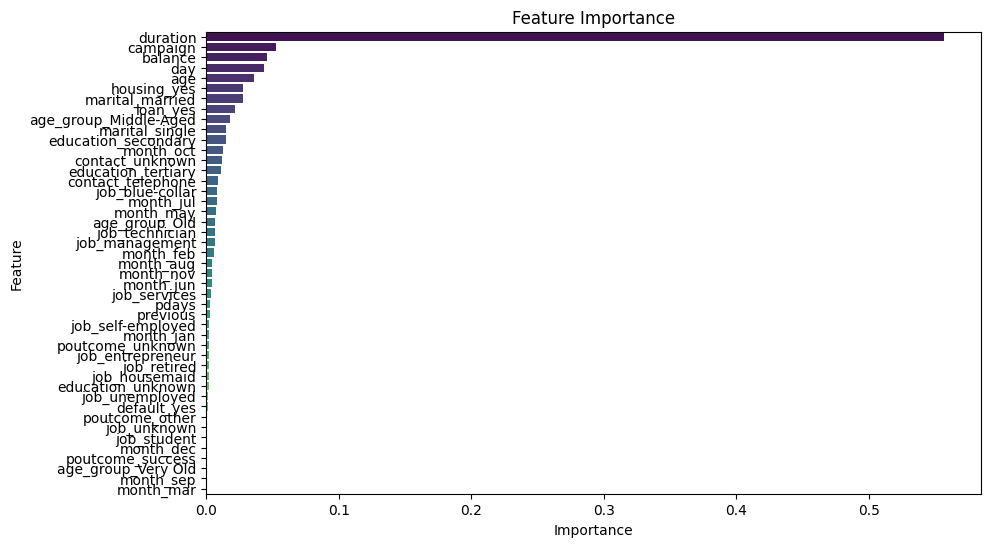

In [13]:
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importance")
plt.show()

The above chart show that call duration is the main motivating factor that influenced the people to subscribe.

Saving the model the trained model

In [14]:
import joblib
joblib.dump(rf_model, 'model.pkl')

['model.pkl']